In [1]:
import tensorflow as tf
import numpy as np
from formatData import loadData
from sklearn.model_selection import train_test_split
from gan import GenAdvNetwork
import os
from matplotlib import pyplot as plt

2023-03-05 21:59:09.521175: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
"""
Loading data
Note than we can only specify absolute location of the raw data
"""
molRep2D, energies = loadData(12, "/home/panthibivek/thesis/GAN_pkg/data/traj.xyz")
#randomize the data and split it into training and test set
# unison_shuffle(molRep2D, energies)
X_train, X_test, y_train, y_test = train_test_split(molRep2D,energies,
                                   random_state=104, 
                                   test_size=0.1, 
                                   shuffle=True)

print("Training data size:", X_train.shape)
print("Test data size:", X_test.shape)

input data size: (10000, 78)
output data size: (10000,)
Training data size: (9000, 78)
Test data size: (1000, 78)


In [3]:
latent_dim_ = 78
epochs_ = 20
batch_size_ = 32
y_train = np.reshape(y_train, (-1, 1))
X_train = np.array(X_train)
X_train = X_train.astype(float)
X_train = np.reshape(X_train, (-1, 78, 1))
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.shuffle(buffer_size=100).batch(batch_size_)

2023-03-05 21:59:11.642028: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-05 21:59:11.642103: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-05 21:59:11.693321: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-05 21:59:11.693388: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-05 21:59:11.693430: I tensorflow/compiler/xla/stream_executo

In [4]:
GAN_model = GenAdvNetwork(latent_dim=latent_dim_, batch_size=batch_size_)
GAN_model.compile(
    generator_opt=tf.keras.optimizers.Adam(learning_rate=0.001),
    discriminator_opt=tf.keras.optimizers.Adam(learning_rate=0.001),
    disc_loss=tf.keras.losses.BinaryCrossentropy(),
    gen_loss=tf.keras.losses.MAE
)
history = GAN_model.fit(dataset, epochs=epochs_)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                1027      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 13)                0         
                                                                 
 reshape (Reshape)           (None, 13, 1)             0         
                                                                 
 conv1d_transpose (Conv1DTra  (None, 39, 128)          640       
 nspose)                                                         
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 39, 128)           0         
                                                                 
 batch_normalization (BatchN  (None, 39, 128)          512       
 ormalization)                                           

2023-03-05 21:59:11.737087: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.737827: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.744874: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.745317: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.748133: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.748675: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.749415: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.749920: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.750385: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11

Epoch 1/20


2023-03-05 21:59:11.909976: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.911747: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.913464: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.914106: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.914802: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.915355: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.915776: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.916224: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.916642: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11

  1/282 [..............................] - ETA: 43s - g_loss: 7.7655 - d_loss: 0.5834

2023-03-05 21:59:11.944846: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.948724: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.949425: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.950527: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.951082: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.951553: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.952211: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.953007: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11.953453: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 21:59:11

282/282 [==============================] - 18s 63ms/step - g_loss: 7.1883 - d_loss: 0.0931
Epoch 2/20
282/282 [==============================] - 18s 63ms/step - g_loss: 7.1216 - d_loss: 4.8428e-05
Epoch 3/20
282/282 [==============================] - 18s 63ms/step - g_loss: 7.1146 - d_loss: 1.7475e-05
Epoch 4/20
282/282 [==============================] - 18s 63ms/step - g_loss: 7.1144 - d_loss: 8.5907e-06
Epoch 5/20
282/282 [==============================] - 18s 63ms/step - g_loss: 7.1137 - d_loss: 5.1207e-06
Epoch 6/20
282/282 [==============================] - 18s 63ms/step - g_loss: 7.1064 - d_loss: 3.8251e-06
Epoch 7/20
282/282 [==============================] - 18s 63ms/step - g_loss: 7.1064 - d_loss: 2.5127e-06
Epoch 8/20
282/282 [==============================] - 18s 63ms/step - g_loss: 7.1062 - d_loss: 1.7586e-06
Epoch 9/20
282/282 [==============================] - 18s 63ms/step - g_loss: 7.1061 - d_loss: 1.2821e-06
Epoch 10/20
282/282 [==============================] - 18s 63

In [5]:
train_dir = os.path.dirname(os.path.abspath("__file__")) + "/runs/train/weights/"
GAN_model.save_weights(train_dir + "weights.h5")

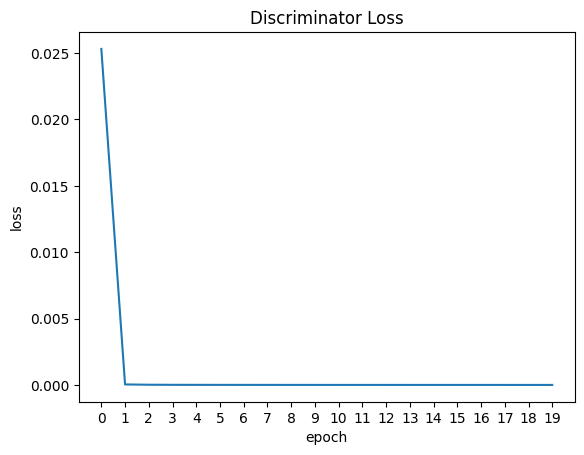

In [12]:
plt.plot(history.history['d_loss'])
plt.title('Discriminator Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(range(epochs_), map(np.int64, range(epochs_)))
fig1 = plt.gcf()
plt.show()
fig1.savefig(train_dir + 'disLoss.png', dpi = 300)

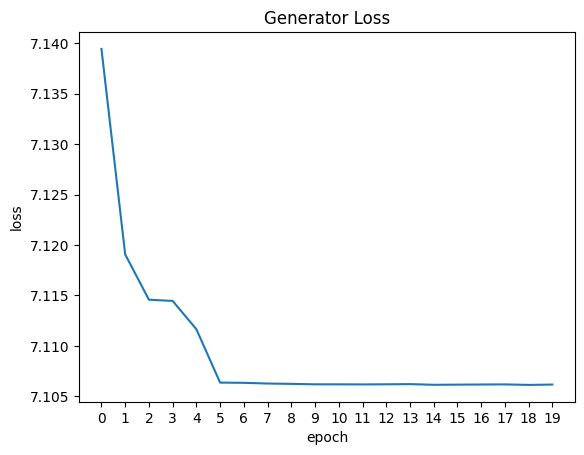

In [13]:
plt.plot(history.history['g_loss'])
plt.title('Generator Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(range(epochs_), map(np.int64, range(epochs_)))
fig1 = plt.gcf()
plt.show()
fig1.savefig(train_dir + 'disLoss.png', dpi = 300)